In [1]:
%load_ext autoreload
%autoreload 2
from torchvision import transforms
import matplotlib.pyplot as plt
from colour import CCT_to_xy, xy_to_XYZ, XYZ_to_RGB
from colorsys import rgb_to_hsv
from numpy import array

In [13]:
# Inverse of RGB to XYZ matrix from lecture notes
# XYZ_to_RGB_matrix = array([
#     [2.36461, -0.896541, -0.468073],
#     [-0.515166, 1.42641, 0.0887581],
#     [0.0052037, -0.0144082, 1.0092]
# ])

# Matrix from colour documentation
XYZ_to_RGB_matrix = array([
    [3.24100326, -1.53739899, -0.49861587],
    [-0.96922426, 1.87592999, 0.04155422],
    [0.05563942, -0.20401120, 1.05714897]
])

def _light_temperature_to_rgb(cct):
    xy = CCT_to_xy(cct)
    xyz = xy_to_XYZ(xy)
    rgb = XYZ_to_RGB(xyz, illuminant_XYZ=None, illuminant_RGB=None, 
                     XYZ_to_RGB_matrix=XYZ_to_RGB_matrix, chromatic_adaptation_transform=None)
    h, s, v = rgb_to_hsv(*rgb)
    return (255 * array([h, s, v])).clip(0, 255).astype(int)

In [14]:
temperatures = [2500, 3500, 4500, 5500, 6500]
temp_dict = {}
for temp in temperatures:
    rgb = _light_temperature_to_rgb(temp)
    temp_dict[temp] = rgb

/home/bzdeco/anaconda3/envs/relighting/lib/python3.7/site-packages/colour/utilities/verbose.py:235: ColourUsageWarning: Correlated colour temperature must be in domain [4000, 25000], unpredictable results may occur!
  warn(*args, **kwargs)


In [15]:
print(temp_dict)

{2500: array([ 14, 231, 255]), 3500: array([ 19, 192, 255]), 4500: array([ 22, 132, 255]), 5500: array([ 24,  65, 255]), 6500: array([ 54,   0, 255])}


In [14]:
from utils.envmap import generate_envmap

In [19]:
generate_envmap('N', 6500, mode='hsv').view(3, 16, 32)

tensor([[[54., 54., 54.,  ..., 54., 54., 54.],
         [54., 54., 54.,  ..., 54., 54., 54.],
         [54., 54., 54.,  ..., 54., 54., 54.],
         ...,
         [54., 54., 54.,  ..., 54., 54., 54.],
         [54., 54., 54.,  ..., 54., 54., 54.],
         [54., 54., 54.,  ..., 54., 54., 54.]],

        [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]],

        [[ 7.,  9., 10.,  ..., 12., 10.,  9.],
         [ 8., 10., 11.,  ..., 14., 11., 10.],
         [ 9., 10., 13.,  ..., 15., 13., 10.],
         ...,
         [ 9., 11., 13.,  ..., 16., 13., 11.],
         [ 9., 10., 13.,  ..., 15., 13., 10.],
         [ 8., 10., 11.,  ..., 14., 11., 10.]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


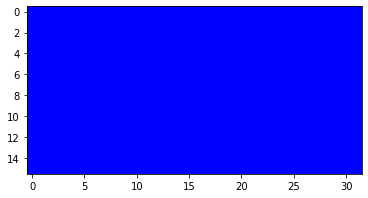